# 4. 라이브러리
## 4.3. MatplotLib 라이브러리
### 4.3.1 데이터 시각화
+ 데이터 시각화(data visualization)
  + 데이터 분석 결과를 쉽게 이해할 수 있도록 표현하고 전달되는 과정
  + 복잡한 정보를 한 눈에 파악하고, 숨겨진 패턴이나 관계를 드러냄
  + 탐색적 자료 분석(EDA), 결과 해석, 의사결정 등에 폭넓게 활용

<br>

+ MatplotLib
  + 넘파이 배열을 기반으로 만들어진 다중 플랫폼 데이터 시각화 라이브러리
  + 다양한 운영체제와 그래픽 백엔드에서 안정적으로 작동


<br>

### 4.3.2 데이터 시각화 유형

|유형|설명|
|:---:|:------------|
|선 그래프 (line plot)|- 시계열 데이터의 추세 표현 <br>- 색상(`color`), 선 종류(`linestyle`), 마커(`marker`) 등|
|막대 그래프 (bar plot)|- 범주형 데이터의 값 비교 <br>- 색상(`color`), 너비(`width`), 정렬(`align`) 등|
|히스토그램 (histogram)|- 수치형 데이터의 분포 파악 <br>- 색상(`color`), 구간 수(`bins`), 누적 여부(`cumulative`) 등|
|산점도 (scatter plot)|- 두 수치형 변수 사이의 관계 표현 <br>- 색상(`c`), 점 크기(`s`), 투명도(`alpha`) 등|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## 실습 데이터 : air_quality 데이터셋
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv")

In [3]:
# city: 측정 도시
# country: 측정 국가
# date.utc: 측정 일시(UTC)
# location: 측정 위치
# parameter: 측정 항목
# value: 측정 값
# unit: 측정 단위
print(air_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB
None


In [4]:
print(air_quality.head())

    city country                   date.utc location parameter  value   unit
0  Paris      FR  2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
1  Paris      FR  2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
2  Paris      FR  2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
3  Paris      FR  2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³
4  Paris      FR  2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³


In [5]:
air_quality['city'].value_counts()

city
Paris        1004
London        969
Antwerpen      95
Name: count, dtype: int64

In [6]:
air_quality['parameter'].value_counts()

parameter
no2    2068
Name: count, dtype: int64

In [7]:
# date.utc 열을 datetime 형식으로 변환
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'])

In [8]:
print(air_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB
None


In [9]:
print(air_quality.head())

    city country                  date.utc location parameter  value   unit
0  Paris      FR 2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
1  Paris      FR 2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
2  Paris      FR 2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
3  Paris      FR 2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³
4  Paris      FR 2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³


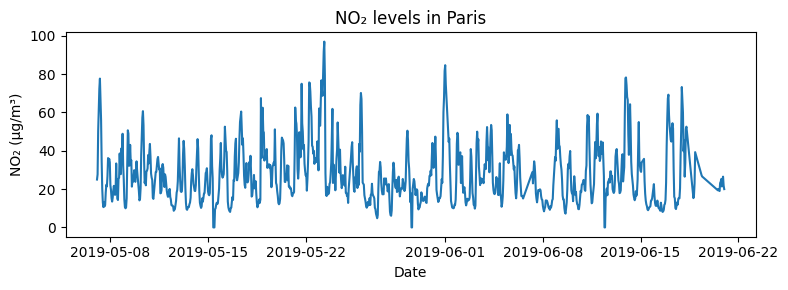

In [10]:
## 선 그래프
# 1) Paris의 NO2 농도 변화: 기본 선 그래프
paris_data = air_quality[air_quality["city"] == "Paris"]

plt.figure(figsize=(8, 3))
plt.plot(paris_data["date.utc"], paris_data["value"])
plt.title("NO₂ levels in Paris")
plt.xlabel("Date")
plt.ylabel("NO₂ (µg/m³)")
plt.tight_layout()
plt.show()

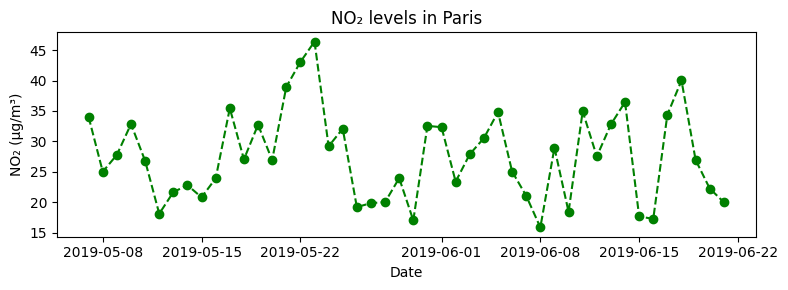

In [11]:
## 선 그래프
# 2) Paris의 NO2 농도 변화: 리샘플링(1시간 → 일간), 커스터마이징(색상, 선 종류, 마커)
# 색상: r, g, b, c, m, y, k, w
# 선 종류: -, --, -., :
# 마커: o, +, D, s, ^, v, .
value_day = paris_data.set_index('date.utc')['value'].resample('D').mean()

plt.figure(figsize=(8, 3))
#plt.plot(value_day.index, value_day, color="green", linestyle="--", marker="o")
plt.plot(value_day.index, value_day, "g--o")
plt.title("NO₂ levels in Paris")
plt.xlabel("Date")
plt.ylabel("NO₂ (µg/m³)")
plt.tight_layout()
plt.show()

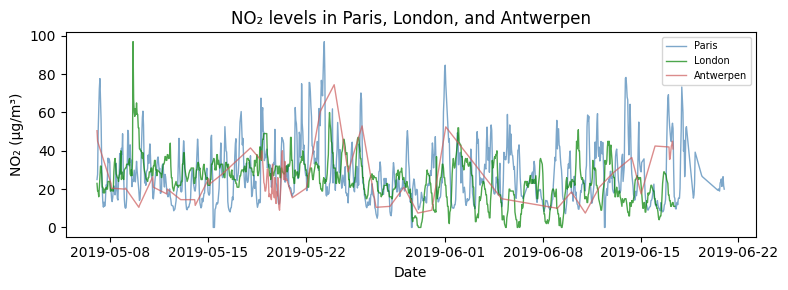

In [12]:
## 선 그래프
# 3) 세 도시의 NO2 농도 변화
cities = ['Paris', 'London', 'Antwerpen']
colors = ['steelblue', 'green', 'indianred']

plt.figure(figsize=(8, 3))

for i, city in enumerate(cities):
    city_data = air_quality[air_quality["city"] == city]
    plt.plot(city_data['date.utc'], city_data['value'],
             label=city, color=colors[i],
             linewidth=1, alpha=0.7)

plt.title("NO₂ levels in Paris, London, and Antwerpen")
plt.xlabel("Date")
plt.ylabel("NO₂ (µg/m³)")
plt.legend(loc = 'upper right', fontsize=7)
plt.tight_layout()
plt.show()

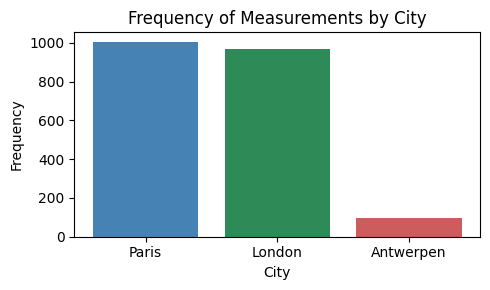

In [13]:
## 막대 그래프
# 1) 도시의 측정 빈도
city_counts = air_quality['city'].value_counts()

plt.figure(figsize=(5, 3))
plt.bar(city_counts.index, city_counts.values, color=['steelblue', 'seagreen', 'indianred'])
plt.title("Frequency of Measurements by City")
plt.xlabel("City")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

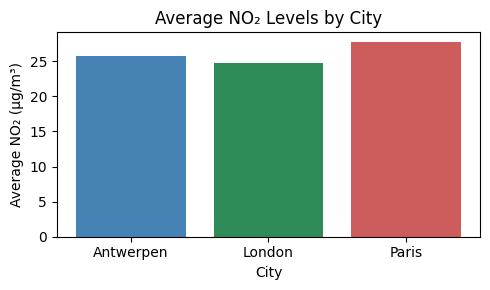

In [14]:
## 막대 그래프
# 2) 도시별 평균 NO₂ 농도
city_avg = air_quality.groupby('city')['value'].mean()

plt.figure(figsize=(5, 3))
plt.bar(city_avg.index, city_avg.values, color=['steelblue', 'seagreen', 'indianred'])
plt.title("Average NO₂ Levels by City")
plt.xlabel("City")
plt.ylabel("Average NO₂ (µg/m³)")
plt.tight_layout()
plt.show()

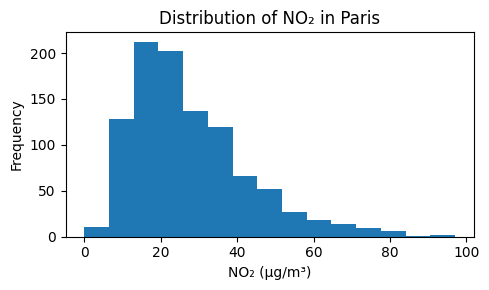

In [15]:
## 히스토그램
# 1) Paris의 NO2 농도 분포
paris_data = air_quality[air_quality["city"] == "Paris"]

plt.figure(figsize=(5, 3))
plt.hist(paris_data["value"], bins=15)
plt.title("Distribution of NO₂ in Paris")
plt.xlabel("NO₂ (µg/m³)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

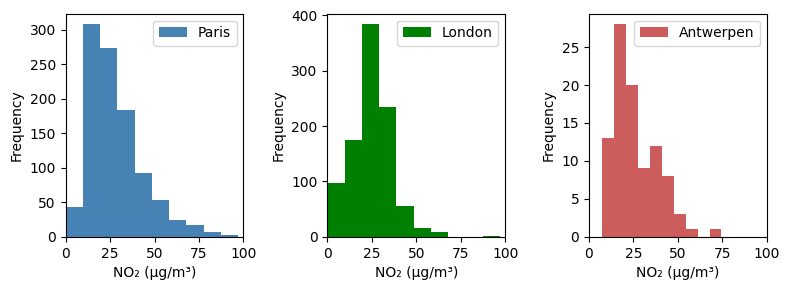

In [16]:
## 히스토그램, 다중 그래프
# 2) 세 도시의 NO2 농도 분포
cities = ['Paris', 'London', 'Antwerpen']
colors = ['steelblue', 'green', 'indianred']

plt.figure(figsize=(8, 3))

for i, city in enumerate(cities):
    city_data = air_quality[air_quality["city"] == city]
    plt.subplot(1, 3, i+1)
    plt.hist(city_data['value'],
             label=city, color=colors[i])
    
    plt.xlabel("NO₂ (µg/m³)")
    plt.ylabel("Frequency")
    plt.legend(loc = 'upper right')
    plt.xlim(0, 100)

plt.tight_layout()
plt.show()

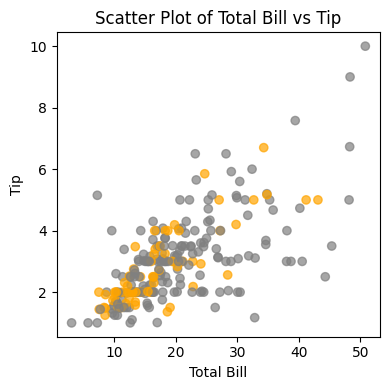

In [17]:
## 산점도
# 전체 금액과 팁 금액 관계
import seaborn as sns
tips = sns.load_dataset("tips")

plt.figure(figsize=(4, 4))
plt.scatter(tips['total_bill'], tips['tip'],
           c=tips['time'].map({'Lunch': 'orange', 'Dinner': 'gray'}), alpha=0.7)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.tight_layout()

<br>

### 4.3.3 이미지 데이터 처리
#### 4.3.3.1. 이미지 불러오기
+ 이미지(image)
  + 디지털 이미지는 수 많은 픽셀(pixel)로 이루어져 있으며, 각 픽셀은 하나의 색상을 나타냄
  + 픽셀들이 모여 하나의 이미지를 구성하며, 전체적으로 모자이크 구조와 비슷함
  + 각 픽셀은 하나의 숫자 값(흑백) 또는 세 개의 값(R, G, B)을 가지며, 이를 통해 색상을 표현함
    + 흑백 이미지 : 2차원 배열 → 행(높이), 열(너비)
    + 컬러 이미지(RGB) : 3차원 배열 → 행(높이), 열(너비), 채널
  + 색의 3요소 RGB
    + 컬러 이미지는 보통 RGB 색상 모델을 따름
    + 각 픽셀은 R, G, B 세 가지 값(0~255)을 조합하여 색상을 나타내며, 각각의 값을 채널(channel)이라 함
    + RGB 이미지는 관례적으로 (height, width, channel) 형태의 배열 구조를 가짐
      + 3차원 배열(높이, 너비, 3)에서 배열의 세 번째 축(axis=2)이 채널 방향임
      + `array[:, :, 0]` : R 채널
      + `array[:, :, 1]` : G 채널
      + `array[:, :, 2]` : B 채널
  + 이미지는 결국 숫자로 이루어진 배열이며, 넘파이 배열로 변환하여 수치 연산이 가능함
  + 이미지 데이터는 수치적으로 처리하거나 분석할 수 있으며, 머신러닝/딥러닝 모델에 입력하기 위해 배열 형태로 변환하는 것이 일반적임

<br>

![](./images/fig4-4.png)
![](./images/fig4-5.png){width=40%}

<br>

+ PIL 라이브러리
  + 다양한 이미지 파일 형식을 지원하는 이미지 처리 라이브러리(Pillow)
  + 이미지 불러오기, 배열 변환, 크기 조절, 회전, 흑백 전환 등 다양한 처리 가능

In [18]:
from PIL import Image

+ 예제 이미지 : <a href="https://unsplash.com/ko/%EC%82%AC%EC%A7%84/%EB%AC%B4%EC%84%B1%ED%95%9C-%EB%85%B9%EC%83%89-%EB%93%A4%ED%8C%90%EC%9D%84-%EA%B0%80%EB%A1%9C%EC%A7%88%EB%9F%AC-%EB%8B%AC%EB%A6%AC%EB%8A%94-%EC%9E%91%EC%9D%80-%EA%B0%9C-Uv1G3yfL2Gg?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>의 <a href="https://unsplash.com/ko/@stefanusfandhy12?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">stefanus fandhy</a>

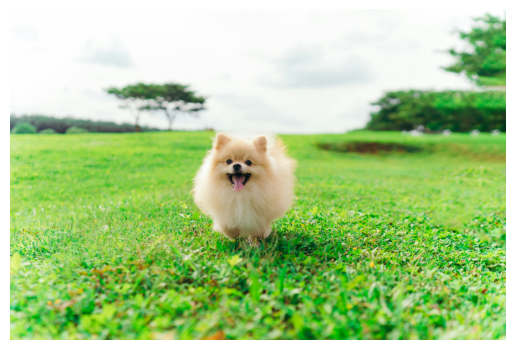

In [19]:
# 이미지 불러오기 및 시각화
img = Image.open('./images/puppy.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
# 넘파이 배열로 변환
img_array = np.array(img)
print("이미지 배열 형태: ", img_array.shape)

이미지 배열 형태:  (3781, 5671, 3)


<br>

#### 4.3.3.2. 색상 채널과 픽셀 단위 조작
+ 컬러 이미지의 각 채널(R, G, B)은 배열의 세 번째 축(axis=2)으로 구분됨
+ 각 채널은 분리하여 별도로 저장하거나 다시 합칠 수 있음
+ 각 채널의 픽셀 값을 직접 수정하거나 덧셈, 곱셈 등 연산을 적용하여 다양한 효과를 줄 수 있음
  + [주의] 픽셀 값이 0~255 범위를 벗어나지 않도록 해야 함
+ 조건문과 불리언 인덱싱(마스킹)을 이용하여 원하는 영역만 선택하거나 조작할 수 있음

In [21]:
# 채널 분리
r = img_array[:, :, 0]
g = img_array[:, :, 1]
b = img_array[:, :, 2]

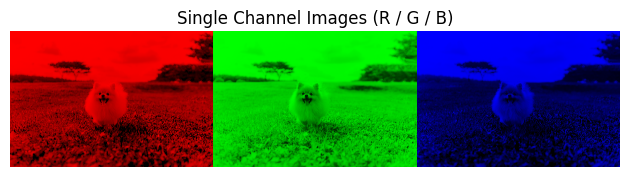

In [22]:
# 단일 채널만 유지
r_img = img_array.copy()
g_img = img_array.copy()
b_img = img_array.copy()

r_img[:, :, [1,2]] = 0
g_img[:, :, [0,2]] = 0
b_img[:, :, [0,1]] = 0

# np.concatenate() : 여러 배열을 지정한 축(axis)을 따라 이어 붙이는 함수
combined_img = np.concatenate([r_img, g_img, b_img], axis=1)

plt.imshow(combined_img)
plt.title("Single Channel Images (R / G / B)")
plt.axis("off")
plt.tight_layout()
plt.show()

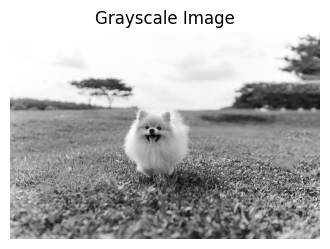

In [23]:
# 흑백 변환 : 채널 평균으로 밝기 계산(simple average)
gray_img = img_array.mean(axis=2)

plt.figure(figsize=(4, 4))
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

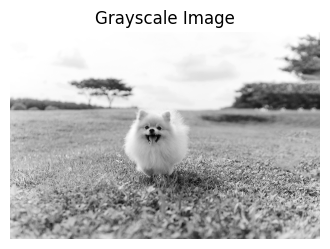

In [24]:
# 흑백 변환 : 가중 평균으로 밝기 계산(weighted average)
gray_img_weighted = r * 0.2989 + g * 0.5870 + b * 0.1140    # ITU-R BT.601 표준 가중치

plt.figure(figsize=(4, 4))
plt.imshow(gray_img_weighted, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

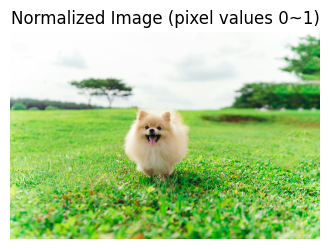

In [25]:
## 정규화 : 픽셀 값을 0~1 사이의 실수로 변환
# 일반적으로 머신러닝/딥러닝 모델 입력 시 이미지를 정규화하여 사용함
# 학습 안정성과 성능 향상을 위한 필수적인 전처리 과정
img_normalized = img_array / 255.0

plt.figure(figsize=(4, 4))
plt.imshow(img_normalized)
plt.title('Normalized Image (pixel values 0~1)')
plt.axis('off')
plt.show()

In [26]:
# 특정 채널만 교체하고, 나머지 채널은 0으로 만드는 함수
def isolate_channel(img_array, channel_idx, channel_array):
    """
    원본 이미지를 복사한 뒤,
    지정한 채널만 channel_data 값으로 바꾸고
    나머지 채널은 0으로 설정해서 반환하는 함수
    
    Args:
        img_array (ndarray): 원본 이미지 배열 (H, W, 3)
        channel_idx (int): 변경할 채널 인덱스 (0: R, 1: G, 2: B)
        channel_array (ndarray): 교체할 채널 배열 (H, W)
        
    Returns:
        ndarray: 채널이 교체되고 나머지는 0인 이미지
    """
    img_copy = img_array.copy()
    img_copy[:, :, :] = 0
    img_copy[:, :, channel_idx] = channel_array
    
    return img_copy

In [27]:
?isolate_channel

Signature: isolate_channel(img_array, channel_idx, channel_array)
Docstring:
원본 이미지를 복사한 뒤,
지정한 채널만 channel_data 값으로 바꾸고
나머지 채널은 0으로 설정해서 반환하는 함수

Args:
    img_array (ndarray): 원본 이미지 배열 (H, W, 3)
    channel_idx (int): 변경할 채널 인덱스 (0: R, 1: G, 2: B)
    channel_array (ndarray): 교체할 채널 배열 (H, W)
    
Returns:
    ndarray: 채널이 교체되고 나머지는 0인 이미지
File:      c:\users\user\appdata\local\temp\ipykernel_21028\1388519242.py
Type:      function

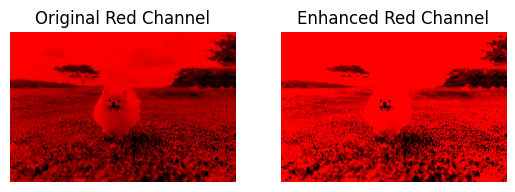

In [28]:
# 특정 채널 강조 : Red Channel
# np.clip() : 넘파이 배열의 값들을 지정한 최소값, 최대값 사이로 제한하는 함수
r_enhanced = np.clip(r * 1.5, 0, 255).astype(np.uint8)

img_red_original = isolate_channel(img_array, 0, r)
img_red_enhanced = isolate_channel(img_array, 0, r_enhanced)

plt.subplot(1, 2, 1)
plt.imshow(img_red_original)
plt.title('Original Red Channel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_red_enhanced)
plt.title('Enhanced Red Channel')
plt.axis('off')

plt.show()

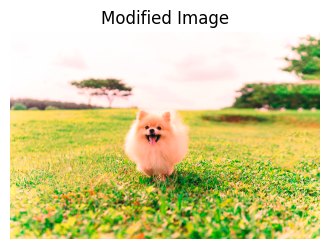

In [29]:
# 채널 합성
# np.stack() : 여러 배열을 새로운 축(axis)을 추가하여 쌓아 3차원 이상의 배열을 만드는 함수
modified_img = np.stack([r_enhanced, g, b], axis=2)

plt.figure(figsize=(4, 4))
plt.imshow(modified_img)
plt.title('Modified Image')
plt.axis('off')
plt.show()

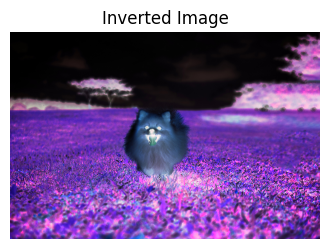

In [30]:
# 색상 반전
inverted = 255 - img_array

plt.figure(figsize=(4, 4))
plt.imshow(inverted)
plt.title('Inverted Image')
plt.axis('off')
plt.show()

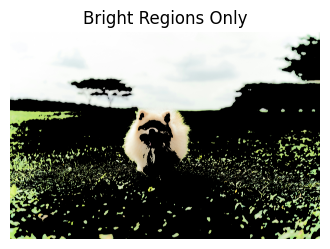

In [31]:
# 밝은 영역만 추출 : 조건문과 마스킹 사용
# 마스킹(masking) : 불리언 배열로 조건에 맞는 데이터만 선택하거나 조작하는 방법
gray = img_array.mean(axis=2)
mask = gray > gray_img.mean()

bright_part = img_array.copy()
bright_part[~mask] = 0                       # 어두운 부분은 검정으로 처리

plt.figure(figsize=(4, 4))
plt.imshow(bright_part)
plt.title('Bright Regions Only')
plt.axis('off')
plt.show()

<br>

#### 4.3.3.3. 이미지 변형
+ 디지털 이미지의 크기, 방향, 위치 등을 변경하는 작업
+ 머신러닝/딥러닝에서 입력 이미지를 정해진 크기로 맞추거나, 데이터 증강(data augmentation)을 위해 변형을 적용함
+ PIL(Pillow) 라이브러리를 이용하면 다양한 변형 작업을 간단히 수행할 수 있음

<br>

|구분|설명|
|:---:|:------------|
|크기 조절<br>(resize)|  - 이미지의 너비(width)와 높이(height)를 원하는 크기로 변경 <br>- 학습 모델에 입력되는 이미지 크기가 고정되어 있는 경우에 필수적인 전처리 작업 <br>- 보간법(interpolation)에 따라 이미지 품질에 차이가 발생할 수 있음|
|회전 및 뒤집기<br>(rotate & flip)|- 회전(rotation) : 이미지를 특정 각도만큼 회전 <br>- 좌우/상하 뒤집기(flip) : 이미지를 반전시켜 대칭 구조로 만듦 <br>- 데이터 다양성을 높이기 위한 증강 기법으로 자주 사용됨|
|잘라내기<br>(crop)|- 이미지의 일부분만 선택하여 잘라냄 <br>- 관심 영역(Region of Interest, ROI)만 추출할 때 유용 <br>- 정사각형으로 자르거나 특정 좌표를 기준으로 잘라내기 가능|

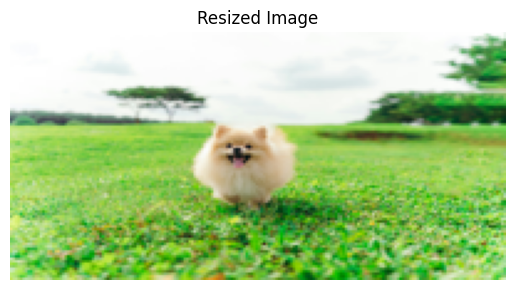

In [32]:
# 크기 조절 : 너비 200px, 높이 100px
resized_img = img.resize((200, 100))

plt.imshow(resized_img)
plt.title('Resized Image')
plt.axis('off')
plt.show()

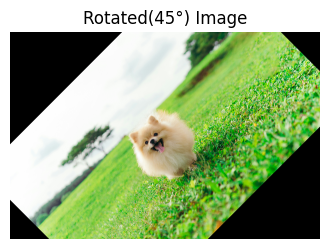

In [33]:
# 45도 회전
rotated_img = img.rotate(45)

plt.figure(figsize=(4, 4))
plt.imshow(rotated_img)
plt.title('Rotated(45°) Image')
plt.axis('off')
plt.show()

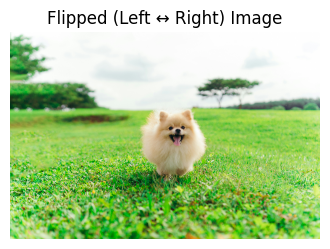

In [34]:
# 좌우 반전 뒤집기
flipped_img1 = img.transpose(Image.FLIP_LEFT_RIGHT)

plt.figure(figsize=(4, 4))
plt.imshow(flipped_img1)
plt.title("Flipped (Left ↔ Right) Image")
plt.axis('off')
plt.show()

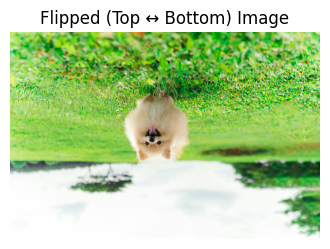

In [35]:
# 상하 반전 뒤집기
flipped_img2 = img.transpose(Image.FLIP_TOP_BOTTOM)

plt.figure(figsize=(4, 4))
plt.imshow(flipped_img2)
plt.title("Flipped (Top ↔ Bottom) Image")
plt.axis('off')
plt.show()

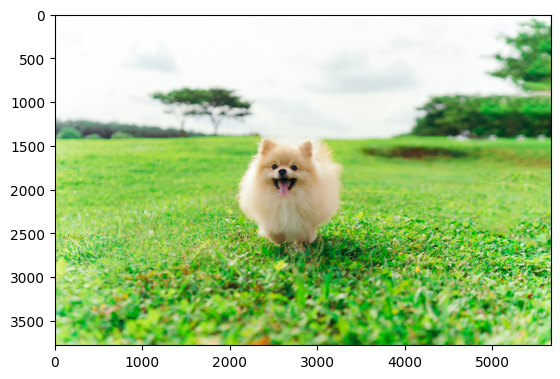

In [36]:
plt.imshow(img)
plt.show()

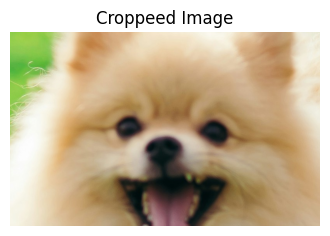

In [37]:
# 잘라내기 : (left, top, right, bottom)
cropped_img = img.crop((2200, 1500, 3000, 2000))
# plt.imshow(img_array[1500:2000, 2200:3000, ])

plt.figure(figsize=(4, 4))
plt.imshow(cropped_img)
plt.title("Croppeed Image")
plt.axis('off')
plt.show()

#### 4.3.3.4. 색상 정보 요약
+ 이미지의 색상은 숫자로 표현되며, 각 채널의 평균과 표준편차를 통해 전체적인 색감과 색상 다양성을 파악할 수 있음
+ 히스토그램을 이용하면 각 채널의 밝기 분포를 시각적으로 확인하고, 특정 색이 어느 정도로 포함되어 있는지 쉽게 이해할 수 있음
+ 이는 이미지 분류, 전처리, 피처(feature) 추출 등에 유용하게 활용됨

In [38]:
## 각 채널의 평균
# 평균이 가장 높은 초록색 계열이 이미지에 가장 많이 포함되어 있음
# 다음으로는 빨간색 계열, 파란색 계열 순임
mean_values = np.mean(img, axis=(0, 1))
print(np.around(mean_values, 2))

[162.36 200.03 129.55]


In [39]:
## 각 채널의 표준편차
# 표준편차가 가장 큰 파란색 계열이 밝기 면에서 가장 다양하게 분포하고 있음
# → 밝고 어두운 부분에 걸쳐 넓게 처져 있어 이미지 내에서 변동이 큼
# 초록색 계열은 상대적으로 균일한 밝기 분포를 가짐
std_values = np.std(img, axis=(0, 1))
print(np.around(std_values, 2))

[70.57 45.87 84.53]


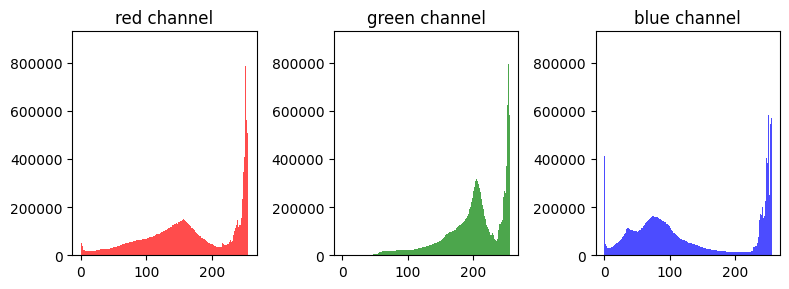

In [40]:
## 각 채널의 히스토그램
colors = ('red', 'green', 'blue')

# 히스토그램에서 최대 빈도 찾기
# np.histogram() : 수치형 데이터의 구간별 빈도를 계산하는 함수
y_max = 0
for i in range(3):
    hist, _ = np.histogram(img_array[:, :, i], bins=np.arange(257))
    y_max = max(y_max, hist.max())

plt.figure(figsize=(8, 3))
for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    plt.hist(img_array[:, :, i].ravel(), bins=np.arange(257), color=color, alpha=0.7)
    plt.ylim([0, y_max * 1.01])
    plt.title(f"{color} channel")
    plt.tight_layout()
plt.show()

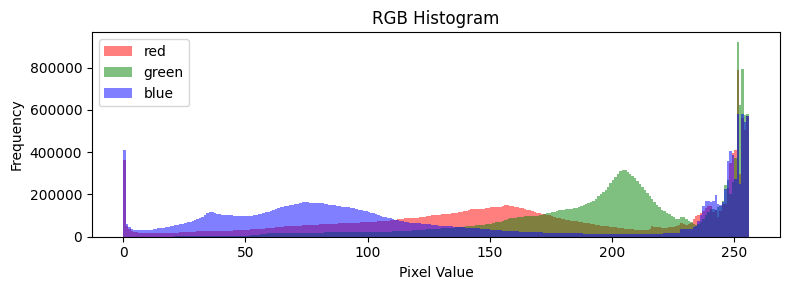

In [41]:
# [빨간색 계열]은 중간 밝기 구간에 은은하게 퍼져있고, 밝은 영역도 일부 포함됨
# → 색감이 다양하지만 극단적인 밝기 변화는 아님(표준편차 중간 수준)

# [초록색 계열]은 밝은 색상이 넓게 분포하고 있으며, 비교적 균일한 색감을 유지함

# [파란색 계열]은 밝은 색상과 어두운 색상이 모두 존재하며, 명암 대비가 큼
# → 그림자나 반사광 효과가 강하게 작용했을 가능성이 있음

## 각 채널의 히스토그램2
colors = ('red', 'green', 'blue')

plt.figure(figsize=(8, 3))
for i, color in enumerate(colors):
    plt.hist(img_array[:, :, i].ravel(), bins=np.arange(257), color=color, alpha=0.5, label=color)
    
plt.title('RGB Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()